In [2]:
import os

def count_jpg_files(folder_path):
    jpg_count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg'):
            jpg_count += 1
    return jpg_count

data_dir = "datasets"
folders = ['test', 'train', 'valid']
total = 2426
for folder in folders:
    pth = os.path.join(data_dir, folder)
    jpg_count = count_jpg_files(pth)
    print(f"Number of JPEG files in {folder}: {jpg_count}, percentage:{jpg_count*100/total:.0f}%")


Number of JPEG files in test: 242, percentage:10%
Number of JPEG files in train: 1716, percentage:71%
Number of JPEG files in valid: 468, percentage:19%


In [3]:
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
from PIL import Image

dataDir = "datasets"
annVal = os.path.join(dataDir, 'test', '_annotations.coco.json')

coco = COCO(annVal)
print(coco)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
dentIds = coco.getCatIds(catNms=['dent']) 
print(f'dent index: \n{dentIds}\n')

dent index: 
[1]



In [24]:
ids = coco.getImgIds(catIds = dentIds)

imgIds = ids[5]
annIds = coco.getAnnIds(imgIds = imgIds, catIds = dentIds)
anns = coco.loadAnns(annIds)

print(f"101th image's annotations: \n{anns}\n")

101th image's annotations: 
[{'id': 12, 'image_id': 8, 'category_id': 1, 'bbox': [182, 169, 89.231, 196.923], 'area': 17571.636, 'segmentation': [[270.769, 187.692, 206.154, 169.231, 186.154, 180, 183.077, 195.385, 181.538, 236.923, 192.308, 347.692, 221.538, 361.538, 255.385, 366.154, 256.923, 301.538, 263.077, 281.538, 255.385, 221.538, 270.769, 187.692]], 'iscrowd': 0}]



In [25]:
imgInfo = coco.loadImgs(imgIds)
print(f'imgInfo: \n{imgInfo}\n')
print(f"fileName: \n{imgInfo[0]['file_name']}")

imgInfo: 
[{'id': 8, 'license': 1, 'file_name': 'Img506_jpg.rf.128d2d53fa3375c543148aa921ee8ca8.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-05-12T07:03:37+00:00'}]

fileName: 
Img506_jpg.rf.128d2d53fa3375c543148aa921ee8ca8.jpg


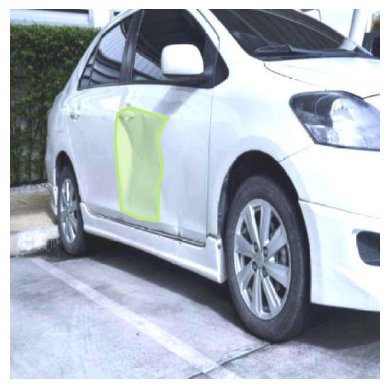

In [26]:
imageName = os.path.join(dataDir, 'test', imgInfo[0]['file_name'])
image = Image.open(imageName).convert('RGB')

plt.axis(False)
plt.imshow(image)
coco.showAnns(anns, draw_bbox = False)

In [8]:
def plot_bar(dictionary, title):
    keys = list(dictionary.keys())[1:]
    values = list(dictionary.values())[1:]

    bars = plt.bar(keys, values)
    plt.xlabel('Items')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(keys)
    bar_color = bars[0].get_facecolor()
    ymin, ymax = plt.gca().get_ylim()
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + (ymax - ymin) * 0.01,
                round(bar.get_height(), 1),
                horizontalalignment='center',
                color=bar_color,
                weight='bold')

    plt.show()

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
datasets\train/_annotations.coco.json class count: {'car-damages': 0, 'dent': 640, 'glass_break': 538, 'scratch': 1371, 'smash': 615}
datasets\train/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '20.23%', 'glass_break': '17.00%', 'scratch': '43.33%', 'smash': '19.44%'}


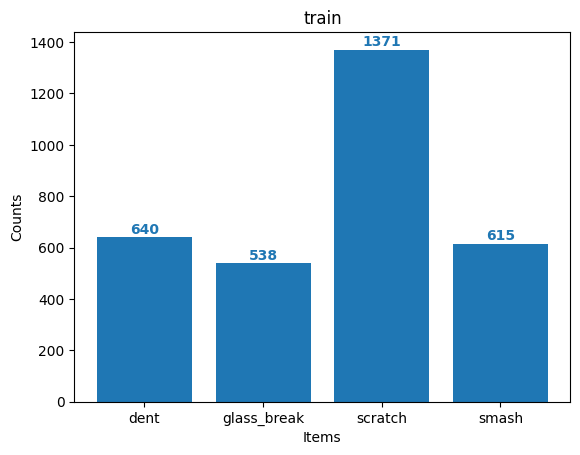

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
datasets\valid/_annotations.coco.json class count: {'car-damages': 0, 'dent': 217, 'glass_break': 141, 'scratch': 253, 'smash': 176}
datasets\valid/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '27.57%', 'glass_break': '17.92%', 'scratch': '32.15%', 'smash': '22.36%'}


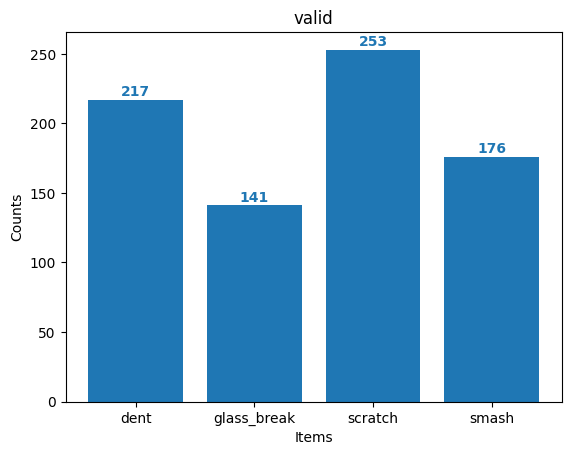

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
datasets\test/_annotations.coco.json class count: {'car-damages': 0, 'dent': 76, 'glass_break': 77, 'scratch': 166, 'smash': 91}
datasets\test/_annotations.coco.json class percentage: {'car-damages': '0.00%', 'dent': '18.54%', 'glass_break': '18.78%', 'scratch': '40.49%', 'smash': '22.20%'}


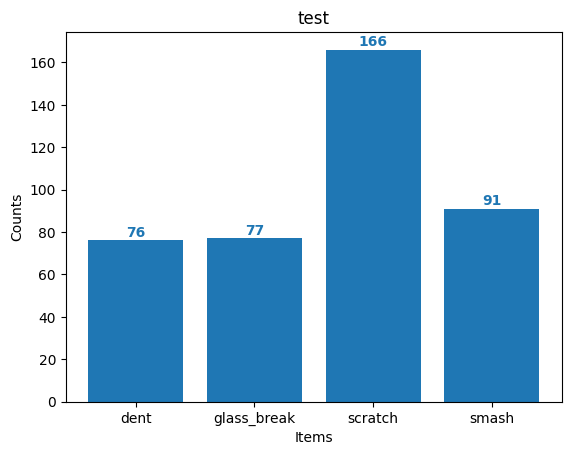

car-damages: 0
dent: 933
glass_break: 756
scratch: 1790
smash: 882


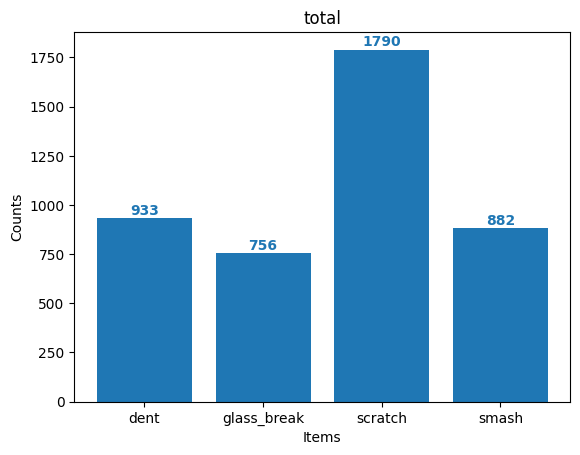

In [10]:
from pycocotools.coco import COCO

def count_instances_per_class(annotations_file):
    coco = COCO(annotations_file)

    category_ids = coco.getCatIds()
    categories = coco.loadCats(category_ids)
    category_names = [category['name'] for category in categories]

    class_counts = {category_name: 0 for category_name in category_names}

    image_ids = coco.getImgIds()
    for image_id in image_ids:
        annotations_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotations_ids)

        for annotation in annotations:
            category_id = annotation['category_id']
            category_name = coco.loadCats(category_id)[0]['name']
            class_counts[category_name] += 1
    print(f"{annotations_file} class count: {class_counts}")
    
    total_instances = 0
    for value in class_counts.values():
        total_instances += value

    percentage_per_class = {class_name: f"{(count / total_instances) * 100:.2f}%" for class_name, count in class_counts.items()}
    print(f"{annotations_file} class percentage: {percentage_per_class}")
    return class_counts

train_annotations_file = os.path.join(data_dir, 'train/_annotations.coco.json')
valid_annotations_file = os.path.join(data_dir, 'valid/_annotations.coco.json')
test_annotations_file = os.path.join(data_dir, 'test/_annotations.coco.json')

train_counts = count_instances_per_class(train_annotations_file)
plot_bar(train_counts, "train")
valid_counts = count_instances_per_class(valid_annotations_file)
plot_bar(valid_counts, "valid")
test_counts = count_instances_per_class(test_annotations_file)
plot_bar(test_counts, "test")

total_counts = {}
for class_name in train_counts.keys():
    total_counts[class_name] = train_counts[class_name] + valid_counts[class_name] + test_counts[class_name]

for category_name, count in total_counts.items():
    print(f"{category_name}: {count}")

plot_bar(total_counts, "total")

In [4]:
import os
import glob

import torch
from torchvision.io import read_image
import numpy as np

means = 0
stds = 0

jpg_files = glob.glob("datasets/train/*.jpg")

for filename in jpg_files:
    # CHW, RGB
    img = read_image(filename)

    img_float = img.float() / 255.0

    mean = torch.mean(img_float, dim=(1, 2))
    std = torch.std(img_float, dim=(1, 2))

    means += mean
    stds += std

means /= len(jpg_files)
stds /= len(jpg_files)

print("Overall mean of each channel (R, G, B):", means)
print("Overall standard deviation of each channel (R, G, B):", stds)


Overall mean of each channel (R, G, B): tensor([0.5735, 0.5618, 0.5681])
Overall standard deviation of each channel (R, G, B): tensor([0.2341, 0.2348, 0.2343])


: 